In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Answered by: John Markton M. Olarte

In [2]:
# %matplotlib inline

In [3]:
data = pd.read_csv("data/movie_metadata_cleaned.csv")

In [4]:
data.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0


## Get the top 10 directors with most movies directed and use a boxplot for their gross earnings

In [5]:
# count the number in which a particular director has directed movies and sort them in descending order
top10_directors = data['director_name'].value_counts().sort_values(ascending=False)
# Exclude movies that do not have a director
top10_directors = top10_directors[top10_directors.index != '0']

# Print the top 10 directors and the number of movies they have directed
print("THE TOP 10 DIRECTORS BASED ON THE NUMBER OF MOVIES THEY HAVE DIRECTED:")
name, count = top10_directors.index, top10_directors.values
for i in range(0,10):
    print(f'TOP {i+1}. {name[i]} with {count[i]} movies')

THE TOP 10 DIRECTORS BASED ON THE NUMBER OF MOVIES THEY HAVE DIRECTED:
TOP 1. Steven Spielberg with 26 movies
TOP 2. Woody Allen with 22 movies
TOP 3. Martin Scorsese with 20 movies
TOP 4. Clint Eastwood with 20 movies
TOP 5. Ridley Scott with 17 movies
TOP 6. Tim Burton with 16 movies
TOP 7. Steven Soderbergh with 16 movies
TOP 8. Spike Lee with 16 movies
TOP 9. Renny Harlin with 15 movies
TOP 10. Oliver Stone with 14 movies


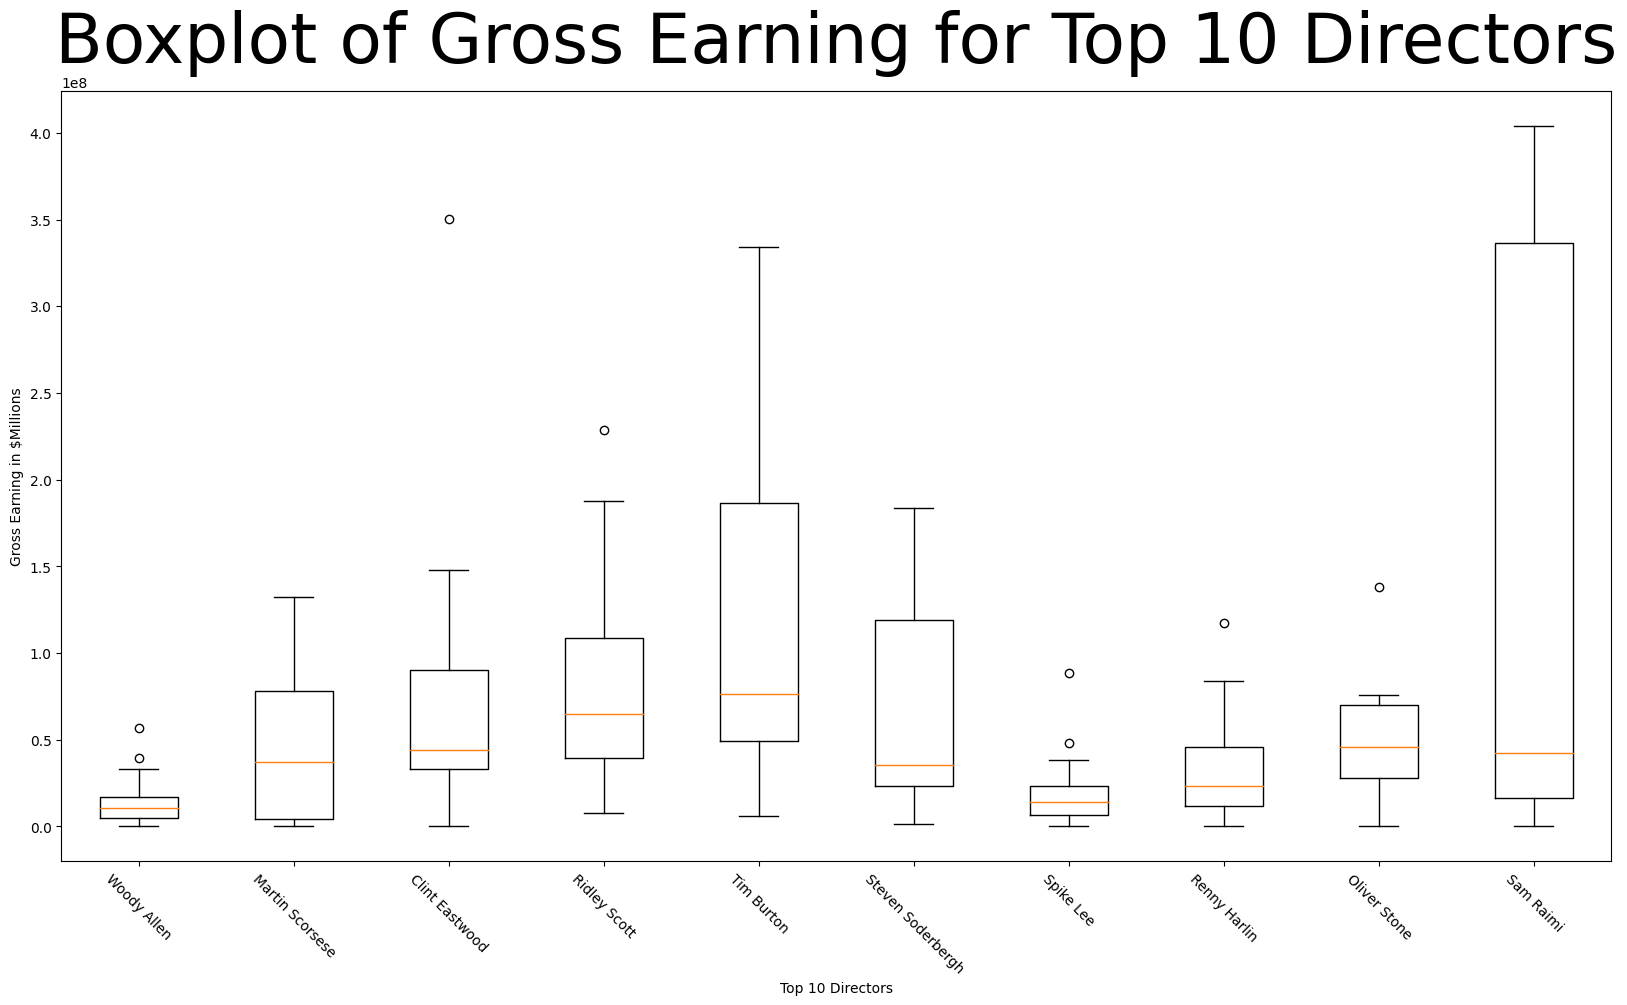

In [6]:
"""
    Using the name of the top 10 directors, we will get their gross earning for all their movies
    and then we will use matplotlib to plot a boxplot for each director.
"""

# Get the gross earning for each director
from matplotlib.pyplot import xlabel, xticks


gross_earning = []
for i in range(1,11):
    gross_earning.append(data[data['director_name'] == name[i]]['gross'].values)

# Create a canvas with a figure size of 20 by 10
plt.figure(figsize=(20,10))
# Create a boxplot for the gross earning of each director
plt.boxplot(gross_earning)
plt.title('Boxplot of Gross Earning for Top 10 Directors', fontsize=50)
# Put the name of the directors on the x-axis
plt.xticks(range(1,11), name[1:11], rotation=-45)
# x and y labels
plt.xlabel('Top 10 Directors')
plt.ylabel('Gross Earning in $Millions')
# Show the plot
plt.show()

## Plot the following variables in one graph:

- num_critic_for_reviews
- IMDB score
- gross

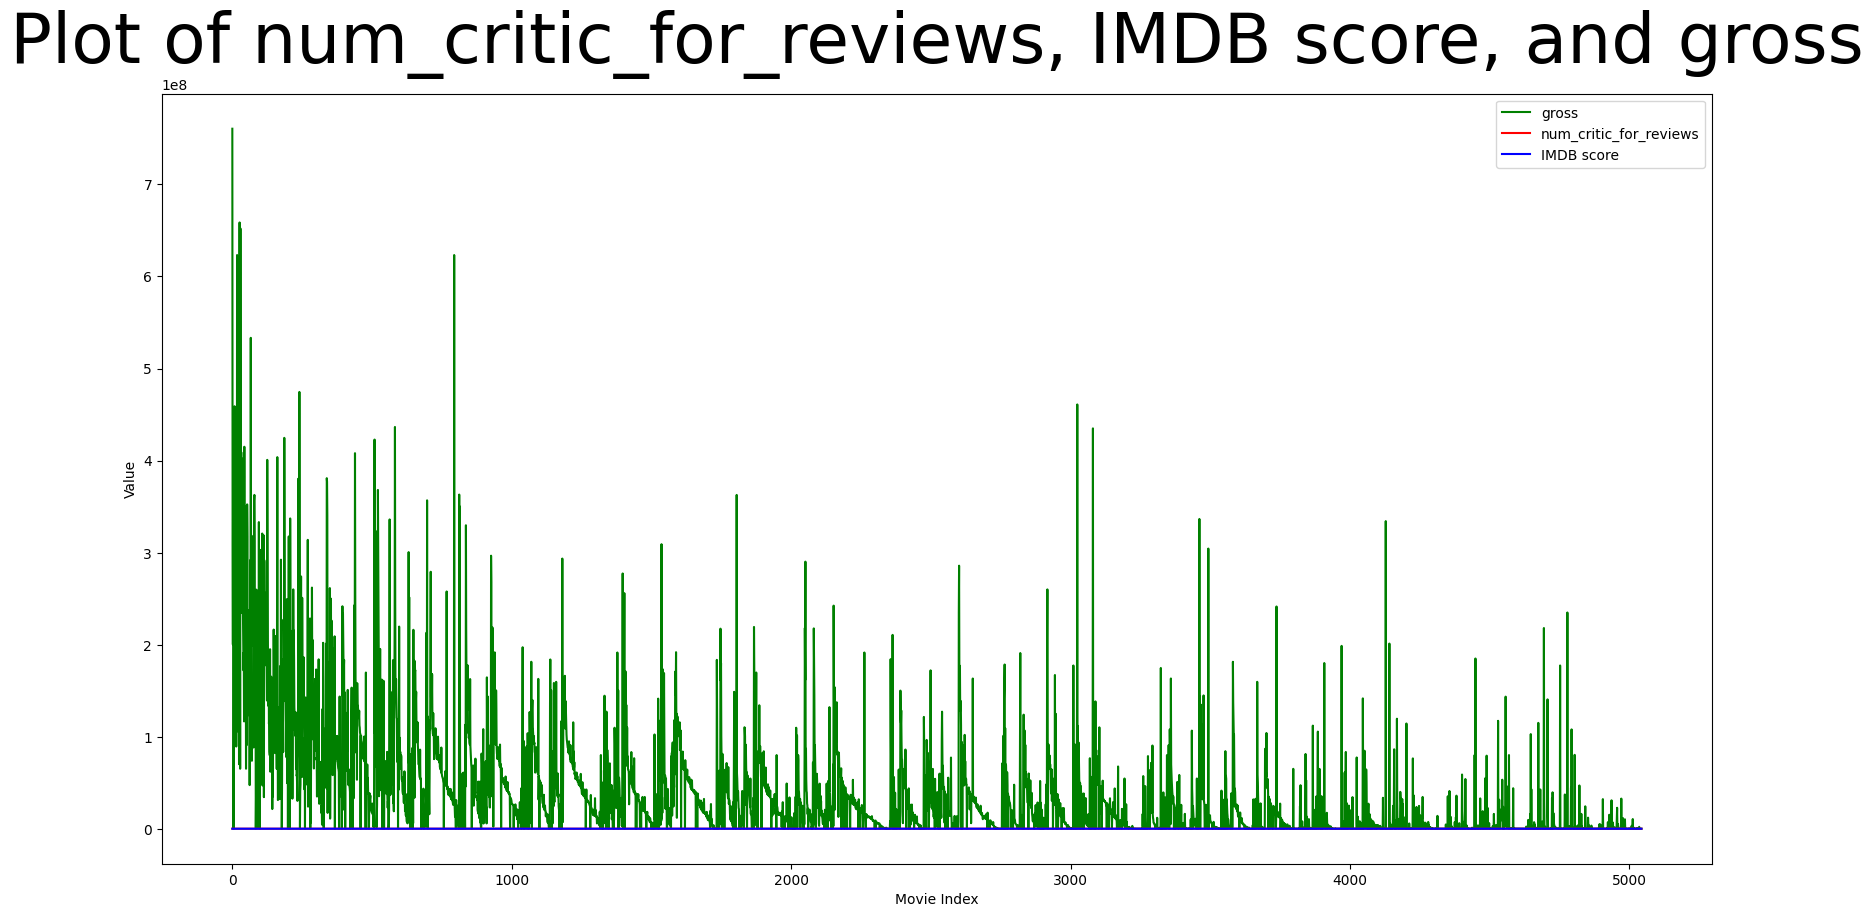

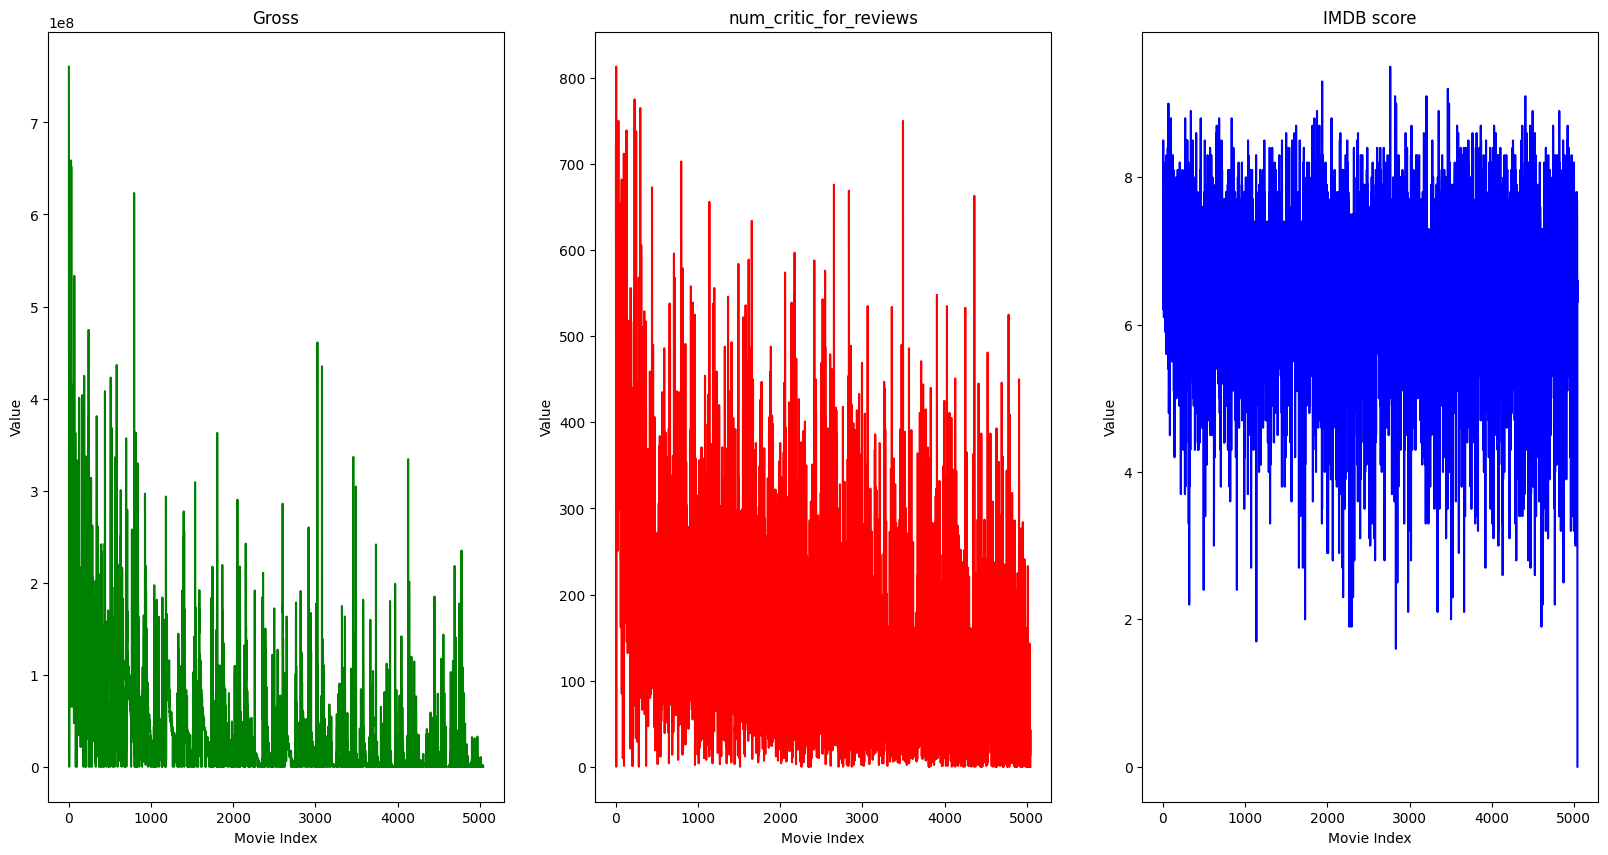

In [7]:
# Plot the data in one graph
plt.figure(figsize=(20,10))
plt.plot(data['gross'], label='gross', color='green')
plt.plot(data['num_critic_for_reviews'], label='num_critic_for_reviews', color='red')
plt.plot(data['imdb_score'], label='IMDB score', color='blue')
plt.title('Plot of num_critic_for_reviews, IMDB score, and gross', fontsize=50)
plt.xlabel('Movie Index')
plt.ylabel('Value')
plt.legend()
plt.show()

# Plot the data side by side
ax, fig = plt.subplots(1,3, figsize=(20,10))

# For Gross Earnings
fig[0].plot(data['gross'], label='gross', color='green')
fig[0].set_title('Gross')
fig[0].set_xlabel('Movie Index')
fig[0].set_ylabel('Value')

# For Number of Critic Reviews
fig[1].plot(data['num_critic_for_reviews'], label='num_critic_for_reviews', color='red')
fig[1].set_title('num_critic_for_reviews')
fig[1].set_xlabel('Movie Index')
fig[1].set_ylabel('Value')

# For IMDB Score
fig[2].plot(data['imdb_score'], label='IMDB score', color='blue')
fig[2].set_title('IMDB score')
fig[2].set_xlabel('Movie Index')
fig[2].set_ylabel('Value')
plt.show()


## Compute Sales (Gross - Budget), add it as another column

In [8]:
# Compute the sales and add it as a new column
data['sales'] = data['gross'] - data['budget']

# Print the data with the new column
data
# You'll observe that the new column is added at the end (prev number of columns = 29, new number of columns = 30)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,5039,b'The Following ',Color,0,43.0,43.0,0.0,319.0,Valorie Curry,841.0,...,English,USA,TV-14,0.0,0.0,593.0,7.5,16.00,32000.0,0.0
5040,5040,b'A Plague So Pleasant',Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,...,English,USA,0,1400.0,2013.0,0.0,6.3,0.00,16.0,-1400.0
5041,5041,b'Shanghai Calling',Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,...,English,USA,PG-13,0.0,2012.0,719.0,6.3,2.35,660.0,10443.0
5042,5042,b'My Date with Drew',Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,...,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456.0,84122.0


## Which directors garnered the most total sales?

In [9]:
# First we need to calculate the total sales for each director
# Make a list of the directors
directors = data['director_name'].unique()

# Put the total_sales in a temporary dataframe
temp = pd.DataFrame.from_dict({director: data[data['director_name'] == director]['sales'].sum() for director in directors}, orient='index', columns=['total_sales'])
temp


,total_sales
James Cameron,1.199626e+09
Gore Verbinski,2.586010e+08
Sam Mendes,2.758636e+08
Christopher Nolan,8.082276e+08
Doug Walker,0.000000e+00
...,...
Anthony Vallone,-3.250000e+03
Scott Smith,0.000000e+00
Benjamin Roberds,-1.400000e+03
Daniel Hsia,1.044300e+04


In [10]:
# Since it was not mentioned how many directors we should output, let's just output the top 3 directors based on the total sales

# sort the temp dataframe in descending order
temp = temp.sort_values(by='total_sales', ascending=False)

# Print the top 3 directors and their total sales
print("THE TOP 3 DIRECTORS BASED ON THE TOTAL SALES OF THEIR MOVIES:")
name, count = temp.index, temp.values
for i in range(3):
    print(f'TOP {i+1}. {name[i]} with total movie sales of ${int(count[i]):,}')

THE TOP 3 DIRECTORS BASED ON THE TOTAL SALES OF THEIR MOVIES:
TOP 1. Steven Spielberg with total movie sales of $2,451,332,231
TOP 2. George Lucas with total movie sales of $1,386,641,480
TOP 3. James Cameron with total movie sales of $1,199,625,910


## Plot sales and average likes as a scatterplot. Fit it with a line.

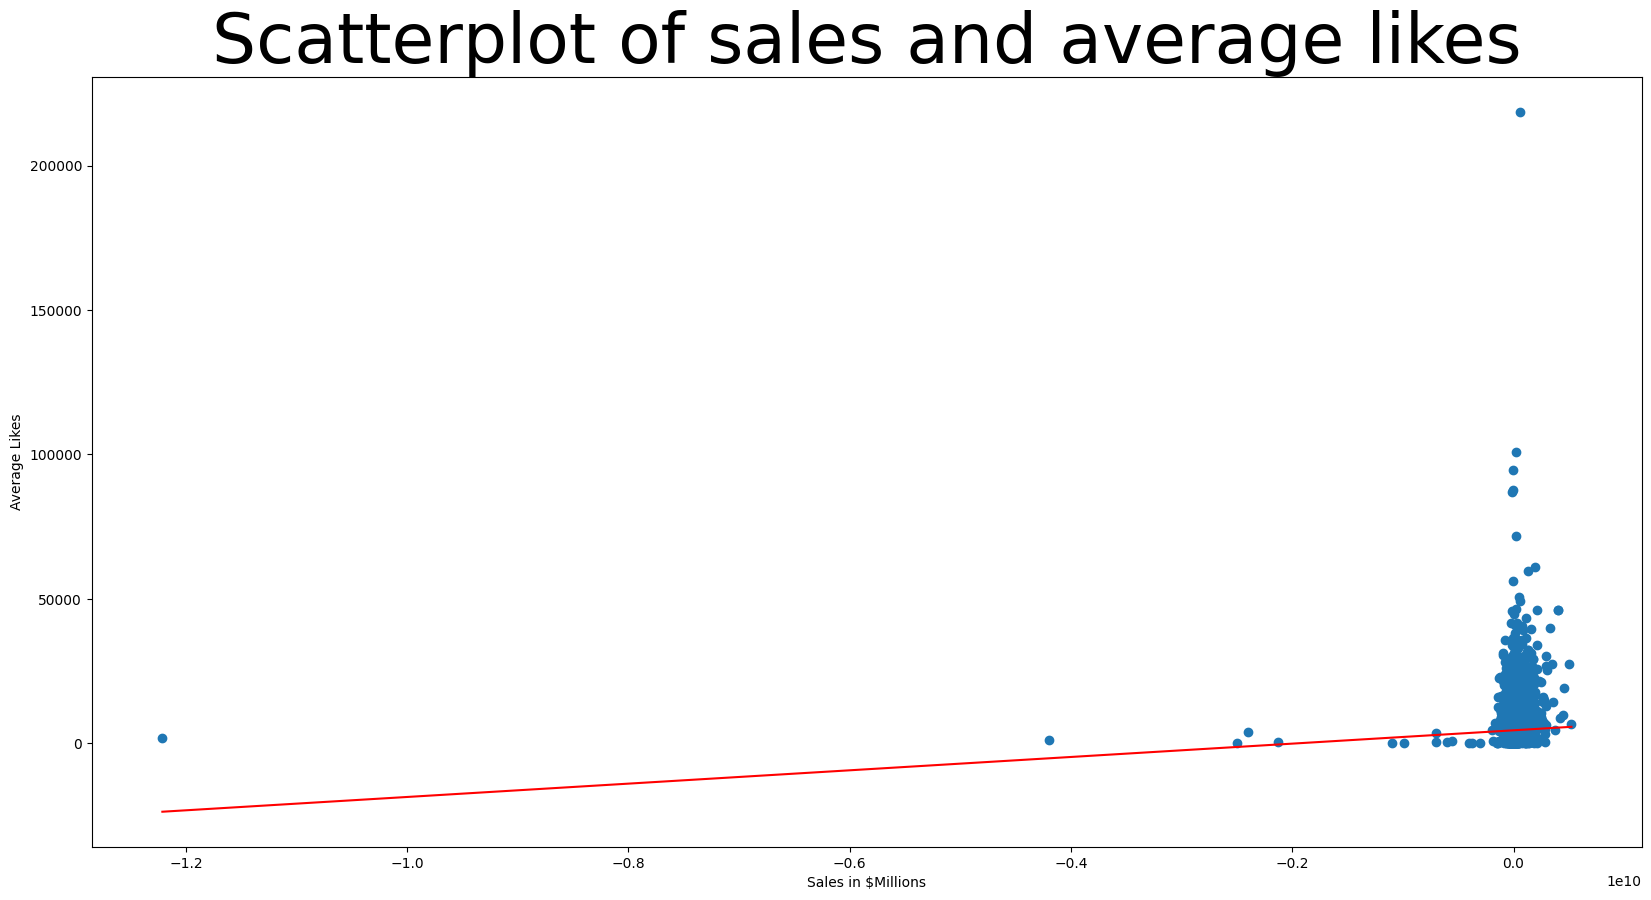

In [11]:
# Before we get the average likes for each movie, we first need to determine which rows contains the likes for each movie
# We can get that using data.filter(regex='like').columns

# Now let's get the average likes for each movie using the mean method and add create a new column for it
# We will use the axis=1 argument to specify that we want to compute the mean for each row
data['average_likes'] = data.filter(regex='like').mean(axis=1)

# Let's make a scatterplot for  the sales and average likes.
plt.figure(figsize=(20,10))
plt.scatter(data['sales'], data['average_likes'])
plt.title('Scatterplot of sales and average likes', fontsize=50)
plt.xlabel('Sales in $Millions')
plt.ylabel('Average Likes')
plt.plot(np.unique(data['sales']), np.poly1d(np.polyfit(data['sales'], data['average_likes'], 1))(np.unique(data['sales'])), color='red')
plt.show()

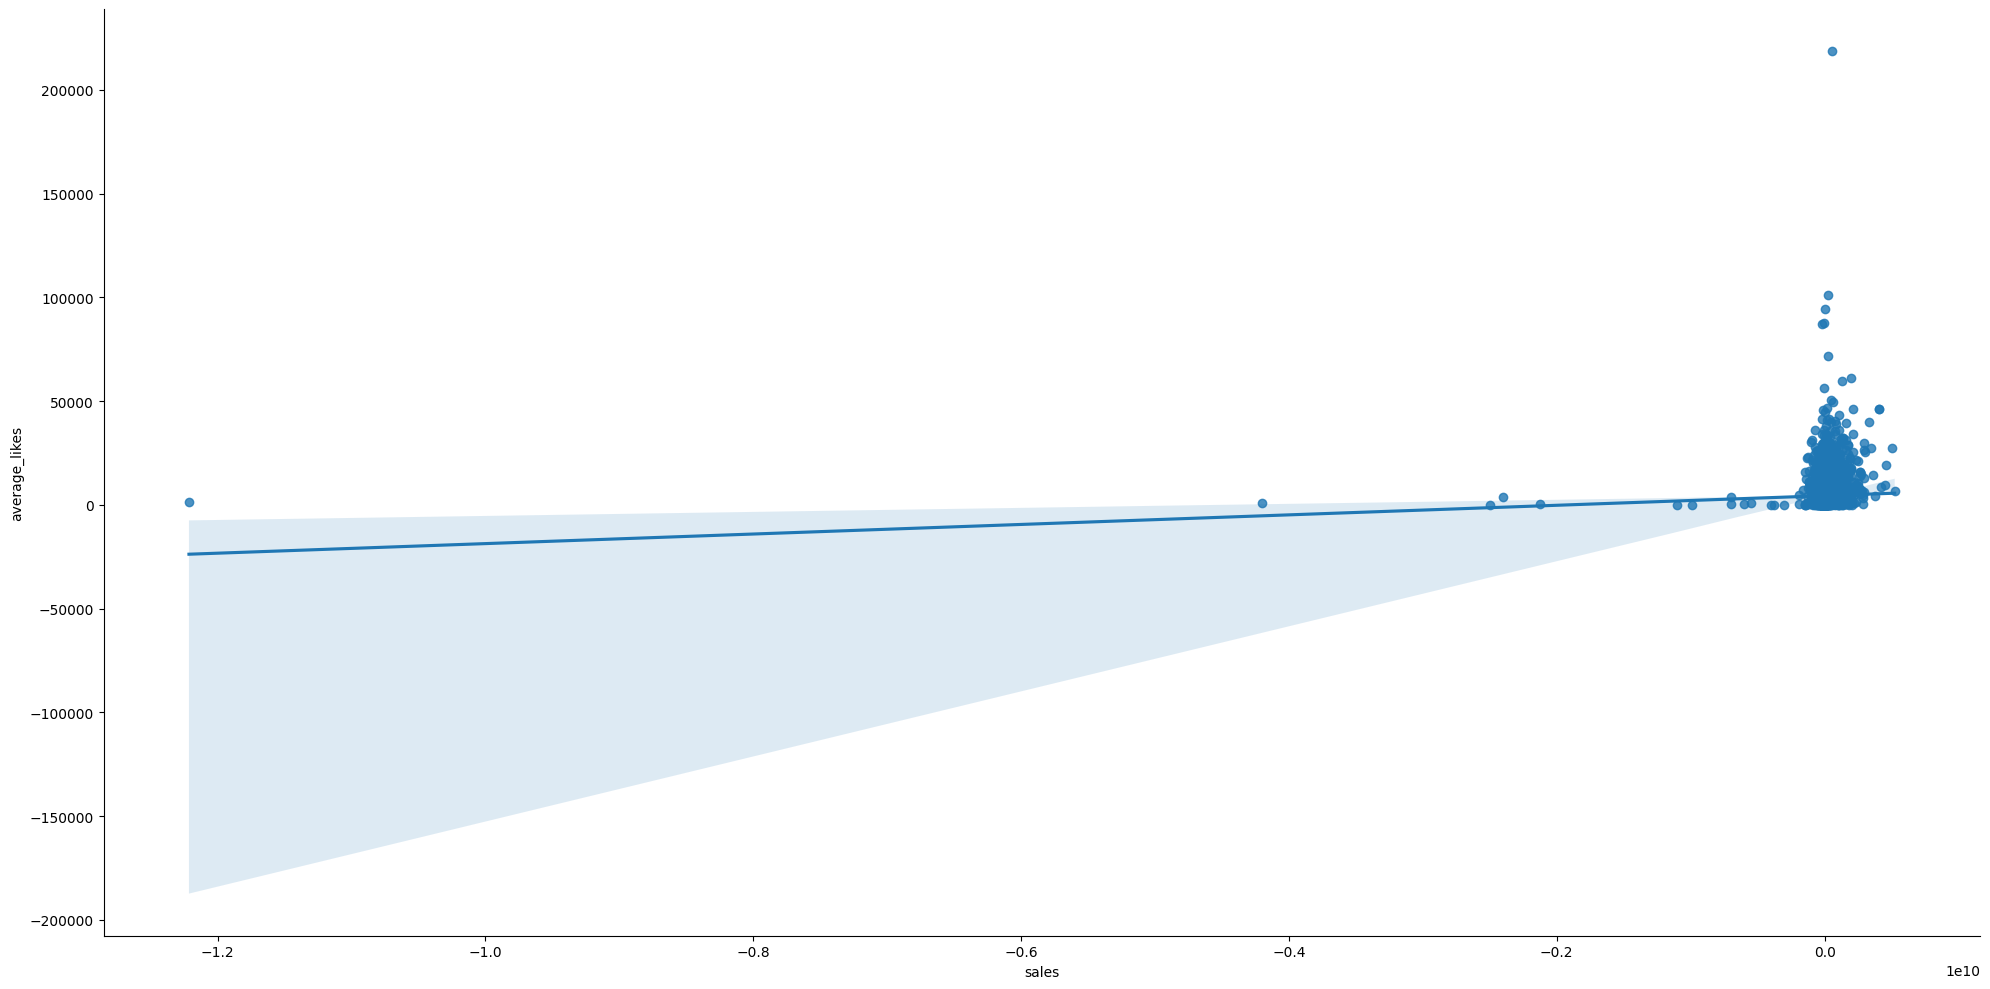

In [12]:
# Let's see it using the seaborn library
from seaborn import lmplot
lmplot(x='sales', y='average_likes', data=data, height=10, aspect=2)

## Which of these genres are the most profitable? Plot their sales using different histograms, superimposed in the same axis.

- Romance
- Comedy
- Action
- Fantasy

In [15]:
# To answer this question, we need to calculate the sales for each movie genre from the given question
genres = ['Romance', 'Comedy', 'Action', 'Fantasy']

# Create a dictionary to store the total sales for each genre
 # Get the total sales for each genre by summing up the sales for each movie in that genre
# Since listed movies in the data contain multiple genres, we need to check if the string contains the genre
total_sales = {genre: data[data['genres'].str.contains(genre)]['sales'].sum() for genre in genres}
   
# Print the most profitable genre
max_genre, max_sales = max(total_sales.items(), key=lambda x: x[1])
print(f'The most profitable genre is {max_genre} with total sales of ${int(max_sales):,}')

# Print the total sales for each genre
print('\n\nTotal sales for each genre:')
for genre, sales in total_sales.items():
    print(f'{genre}: ${int(sales):,}')

The most profitable genre is Comedy with total sales of $12,832,689,231


Total sales for each genre:
Romance: $8,262,484,517

Comedy: $12,832,689,231

Action: $4,157,220,813

Fantasy: $8,186,508,252



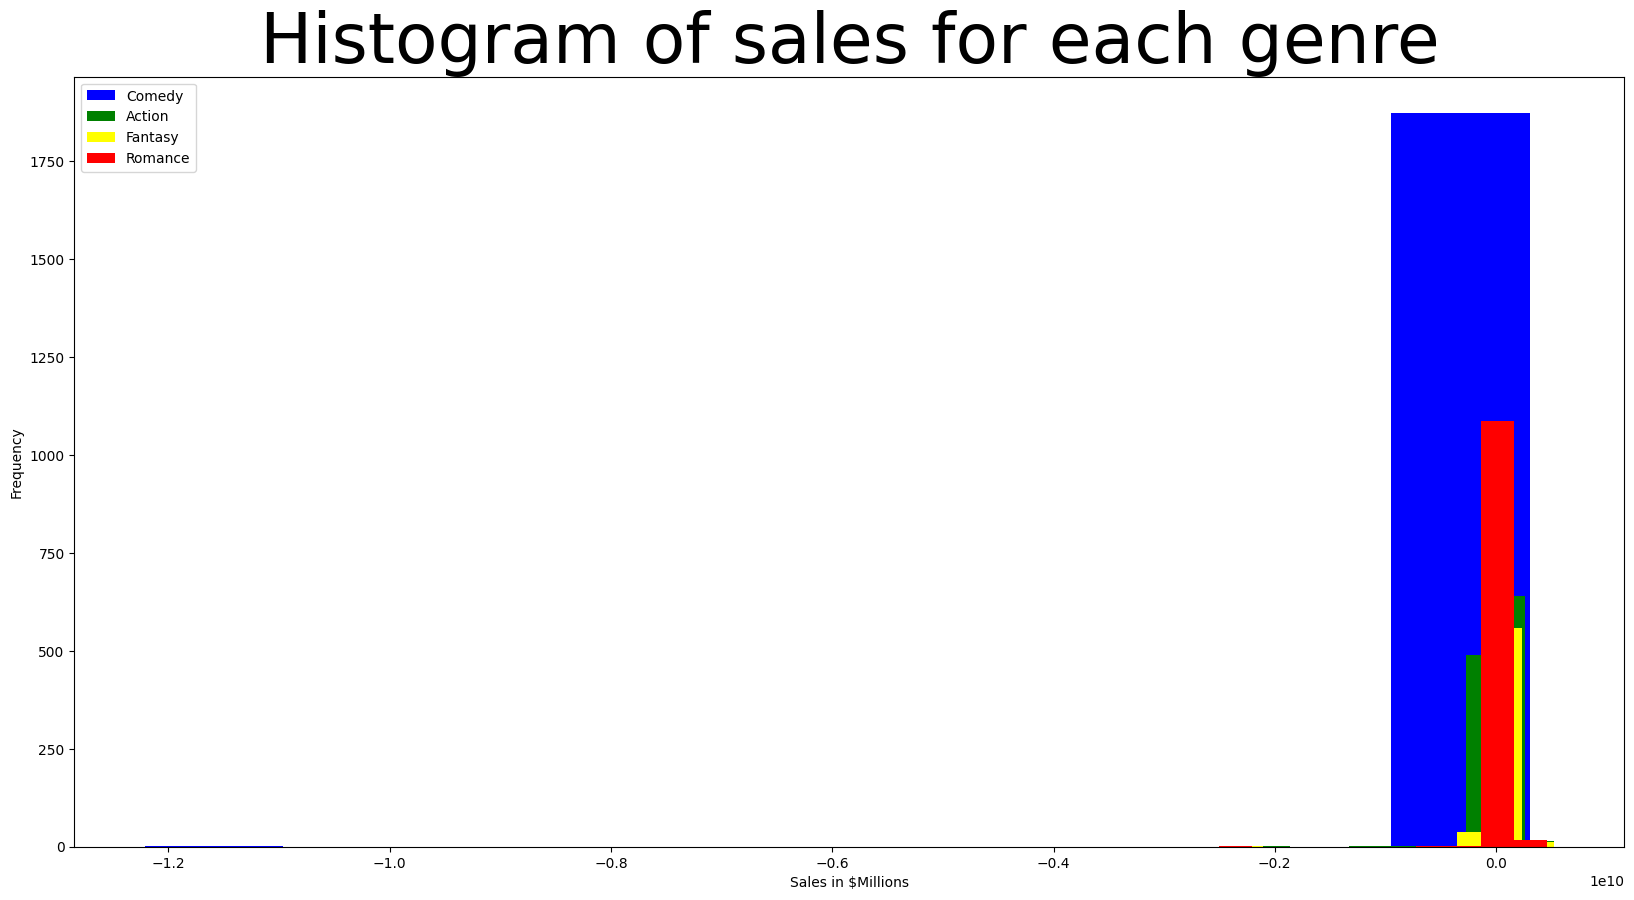

In [14]:
plt.figure(figsize=(20,10))
# Since we need to superimpose the plots, we need to use the same canvas
plt.hist(data[data['genres'].str.contains('Comedy')]['sales'], label='Comedy', color='blue')
plt.hist(data[data['genres'].str.contains('Action')]['sales'], label='Action', color='green')
plt.hist(data[data['genres'].str.contains('Fantasy')]['sales'], label='Fantasy', color='yellow')
plt.hist(data[data['genres'].str.contains('Romance')]['sales'], label='Romance', color='red')

# For title, x and y labels, and legend
plt.title('Histogram of sales for each genre', fontsize=50)
plt.xlabel('Sales in $Millions')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()


In [ ]:
# Let's also plot them side by side
fig, ax = plt.subplots(1, 4, figsize=(20,5))
ax[0].hist(data[data['genres'].str.contains('Comedy')]['sales'], label='Comedy', color='blue')
ax[1].hist(data[data['genres'].str.contains('Action')]['sales'], label='Action', color='green')
ax[2].hist(data[data['genres'].str.contains('Fantasy')]['sales'], label='Fantasy', color='yellow')
ax[3].hist(data[data['genres'].str.contains('Romance')]['sales'], label='Romance', color='red')

# Set the title for each subplot
ax[0].set_title('Comedy Sales')
ax[1].set_title('Action Sales')
ax[2].set_title('Fantasy Sales')
ax[3].set_title('Romance Sales')

# Set the x and y labels for each subplot
ax[0].set_xlabel('Sales in $Millions')
ax[0].set_ylabel('Frequency')
ax[1].set_xlabel('Sales in $Millions')
ax[1].set_ylabel('Frequency')
ax[2].set_xlabel('Sales in $Millions')
ax[2].set_ylabel('Frequency')
ax[3].set_xlabel('Sales in $Millions')
ax[3].set_ylabel('Frequency')

# Show the plot
plt.show()



KeyboardInterrupt: 

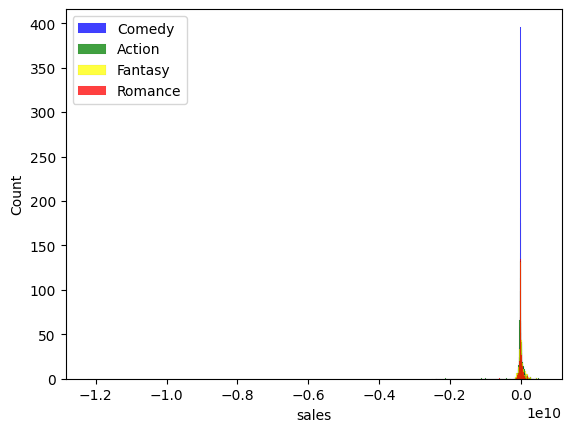

In [21]:
# We can also use the seaborn library to plot the histograms
from seaborn import histplot
ax = histplot(data=data[data['genres'].str.contains('Comedy')], x='sales', label='Comedy', color='blue')
histplot(data=data[data['genres'].str.contains('Action')], x='sales', label='Action', color='green', ax=ax)
histplot(data=data[data['genres'].str.contains('Fantasy')], x='sales', label='Fantasy', color='yellow', ax=ax)
histplot(data=data[data['genres'].str.contains('Romance')], x='sales', label='Romance', color='red', ax=ax)
ax.legend()
ax

## For each of movie, compute average likes of the three actors and store it as a new variable

Read up on the mean function.

Store it as a new column, average_actor_likes.

In [ ]:
# mean axis=1, so we get the mean for each row given the columns that contains the likes for the actors
data["average_actor_likes"] = data[['actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes']].mean(axis=1)

# Show the data of actor 1, 2, and 3 likes and the average actor likes
data[['actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'average_actor_likes']]

## Copying the whole dataframe

In [ ]:
df = data.copy()
df.head()

## Min-Max Normalization 

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the .min() and .max() methods.

$$ 
x_{scaled} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

### Normalize each numeric column (those that have types integer or float) of the copied dataframe (df)

In [ ]:
# Create a list of the columns that contain numerical values
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Normalize the data using the min-max normalization method
for col in numerical_cols:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

# Show data with only the normalized numerical columns
df[numerical_cols]